In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np

# Simulating data for the example
data = {
    'index': np.arange(1, 101),
    'Question': np.random.choice(['Engagement', 'Reach', 'Demographics', 'Conversion'], 100),
    'Segment Type': np.random.choice(['Audience', 'Content', 'Engagement', 'Sentiment'], 100),
    'Segment Description': np.random.choice(['Positive', 'Neutral', 'Negative'], 100),
    'Answer': np.random.choice(['High', 'Medium', 'Low'], 100),
    'Count': np.random.randint(100, 1000, 100),
    'Percentage': np.random.uniform(0, 100, 100).round(2)
}
df = pd.DataFrame(data)
df.head()


,index,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,1,Conversion,Audience,Negative,Low,866,99.13
1,2,Demographics,Sentiment,Neutral,High,488,25.70
2,3,Demographics,Sentiment,Neutral,High,999,28.88
3,4,Demographics,Engagement,Positive,Medium,840,82.10
4,5,Demographics,Sentiment,Positive,Low,475,55.55


index                  0
Question               0
Segment Type           0
Segment Description    0
Answer                 0
Count                  0
Percentage             0
dtype: int64


<ipython-input-64-24c3a30d0b09>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Segment Type', palette='viridis')


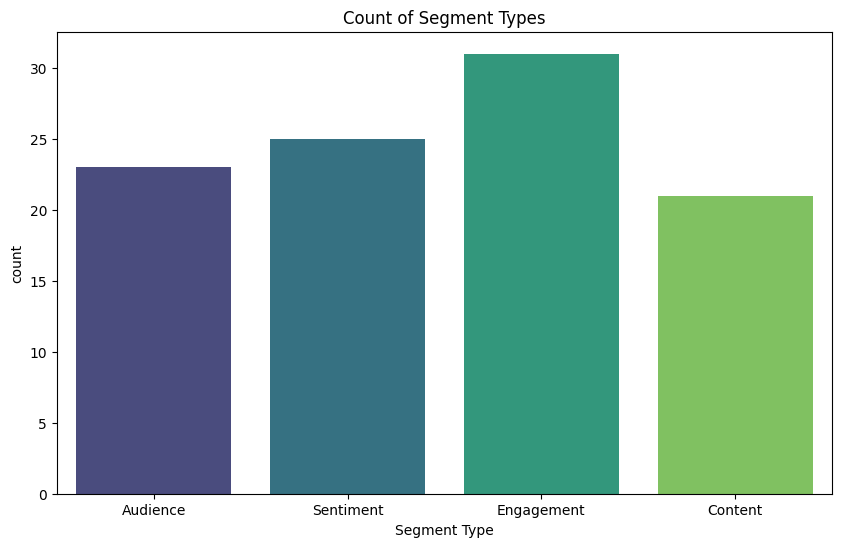

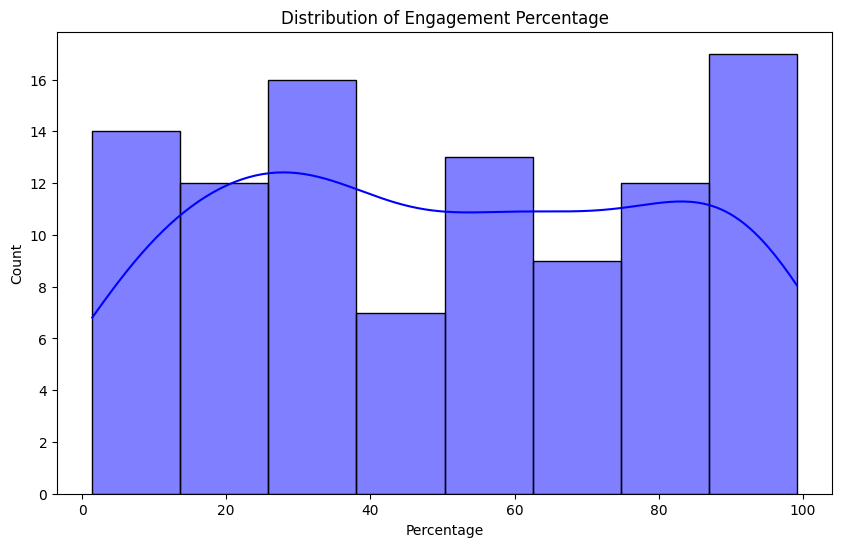

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(df.isnull().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# EDA - Visualizing count of each segment type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Segment Type', palette='viridis')
plt.title("Count of Segment Types")
plt.show()

# Analyze the distribution of Percentage
plt.figure(figsize=(10, 6))
sns.histplot(df['Percentage'], kde=True, color='blue')
plt.title("Distribution of Engagement Percentage")
plt.show()


In [ ]:
# Convert categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Question', 'Segment Type', 'Segment Description', 'Answer'], drop_first=True)
df_encoded.head()


,index,Count,Percentage,Question_Demographics,Question_Engagement,Question_Reach,Segment Type_Content,Segment Type_Engagement,Segment Type_Sentiment,Segment Description_Neutral,Segment Description_Positive,Answer_Low,Answer_Medium
0,1,866,99.13,False,False,False,False,False,False,False,False,True,False
1,2,488,25.70,True,False,False,False,False,True,True,False,False,False
2,3,999,28.88,True,False,False,False,False,True,True,False,False,False
3,4,840,82.10,True,False,False,False,True,False,False,True,False,True
4,5,475,55.55,True,False,False,False,False,True,False,True,True,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


x = df_encoded.drop(columns=['Answer_Medium', 'Answer_Low'])
y = df['Answer']  # Original target variable

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_pred = model.predict(x_test)

Accuracy: 0.26666666666666666

Classification Report:
               precision    recall  f1-score   support

        High       0.10      0.12      0.11         8
         Low       0.57      0.27      0.36        15
      Medium       0.23      0.43      0.30         7

    accuracy                           0.27        30
   macro avg       0.30      0.27      0.26        30
weighted avg       0.37      0.27      0.28        30


Confusion Matrix:
 [[1 3 4]
 [5 4 6]
 [4 0 3]]


<ipython-input-70-c34ac8544981>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(10), x='importance', y='feature', palette='viridis')


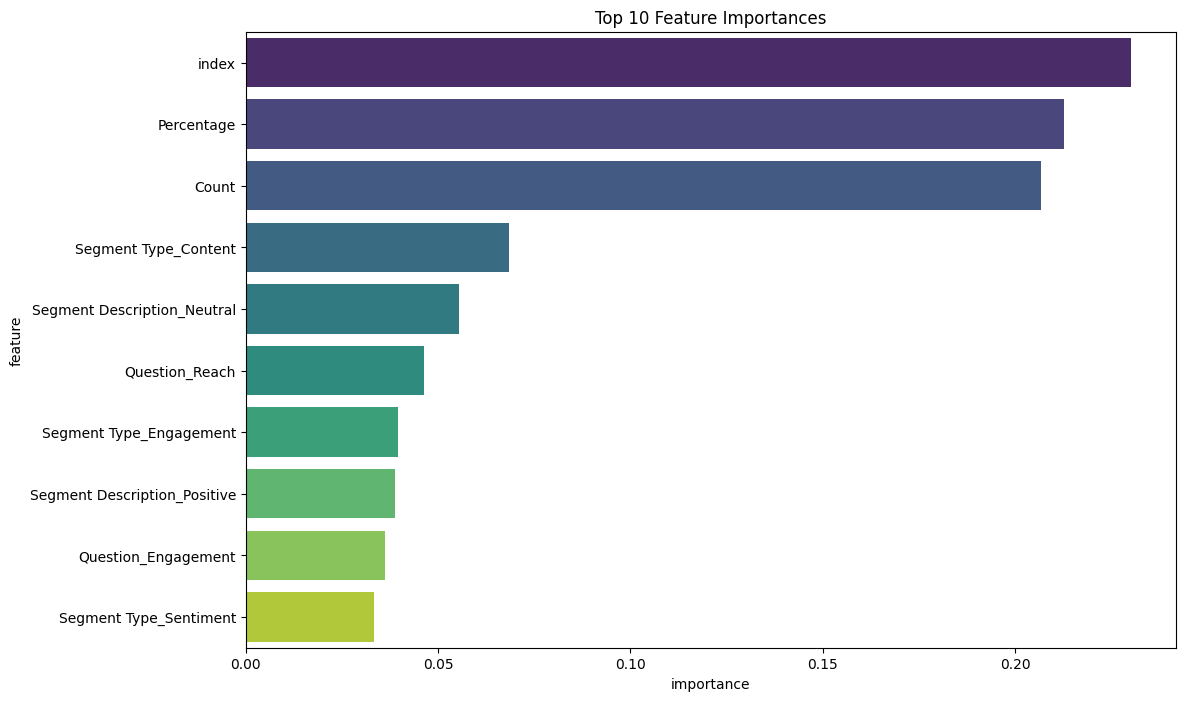

In [ ]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(10), x='importance', y='feature', palette='viridis')
plt.title("Top 10 Feature Importances")
plt.show()
